# Trabalho Parte 2

In [16]:
#!pip install opencv-python

In [14]:
#P/Parte 2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

import PIL
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

from PIL import Image

#SALVAMENTO DOS ARQUIVOS
import pathlib
import urllib.request
import tarfile

# Funções

In [103]:
def carregar_imagem(caminho):
    """Carrega uma imagem RGB."""
    imagem = cv2.imread(caminho)
    if imagem is None:
        raise ValueError("Imagem não encontrada ou caminho inválido.")
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converte BGR para RGB


def carregar_filtro(caminho):
    """Carrega o filtro de um arquivo."""
    with open(caminho, 'r') as arquivo:
        linhas = arquivo.readlines()
        dimensoes = tuple(map(int, linhas[0].strip().split()))
        mascara = np.array([list(map(float, linha.strip().split())) for linha in linhas[1:]])
    return dimensoes, mascara


def aplicar_correlacao(imagem, filtro):
    """Aplica correlação bidimensional em cada canal da imagem."""
    canal_r = cv2.filter2D(imagem[:, :, 0], -1, filtro)
    canal_g = cv2.filter2D(imagem[:, :, 1], -1, filtro)
    canal_b = cv2.filter2D(imagem[:, :, 2], -1, filtro)
    return np.stack([canal_r, canal_g, canal_b], axis=-1)


def salvar_imagem(caminho, imagem):
    """Salva a imagem resultante."""
    cv2.imwrite(caminho, cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR))


def exibir_imagem(imagem, titulo="Imagem"):
    """Exibe a imagem."""
    plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def exibir_imagens_lado_a_lado(imagem_original, imagem_filtrada, fil):
    plt.figure(figsize=(10, 5))

    # Exibir a imagem original
    plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
    plt.imshow(imagem_original, cmap="gray")  # Use cmap="gray" se for em tons de cinza
    plt.title("Imagem Original")
    plt.axis("off")

    # Exibir a imagem filtrada
    plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
    plt.imshow(imagem_filtrada, cmap="gray")
    plt.title(fil)
    plt.axis("off")

    plt.show()


def listar_arquivos_txt(diretorio):
    """Lista todos os arquivos .txt em um diretório e retorna uma lista com seus nomes."""
    arquivos_txt = [arquivo for arquivo in os.listdir(diretorio) if arquivo.endswith('.txt')]
    return arquivos_txt


## Diretório Geral

In [181]:
# Carregar imagem
diretorio = r'C:\Users\kenny\OneDrive\Documentos\UFPB\P7\Processamento Digital de Imagens\TrabalhoPDI2\\'

In [183]:
#Abrindo Imagem
imagem = carregar_imagem(diretorio+'Shapes.png')

#Listando arquivos .txt
lista_txt = listar_arquivos_txt(diretorio)

"""Cada filtro tem um efeito específico:

Filtro Gaussiano: Suaviza a imagem, reduzindo ruídos e detalhes.
Filtro Box: Realiza uma média local, suavizando a imagem.
Filtro Sobel: Detecta bordas na imagem."""

print("Arquivos .txt encontrados:", lista_txt)

Arquivos .txt encontrados: ['box10x1.txt', 'box10x10.txt', 'box1x10.txt', 'gaus5x5.txt', 'sobel_h.txt', 'sobel_v.txt']


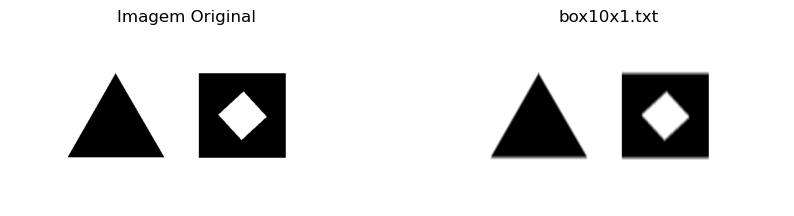

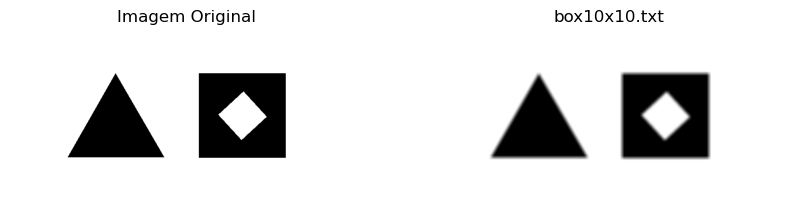

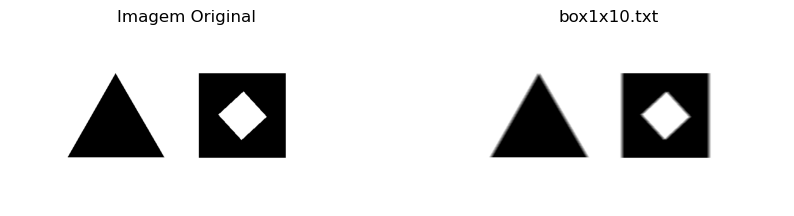

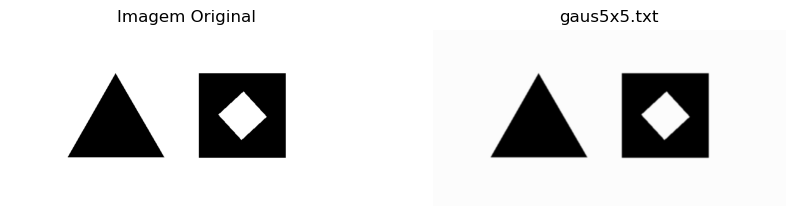

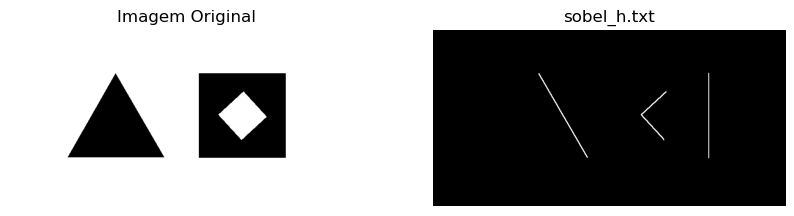

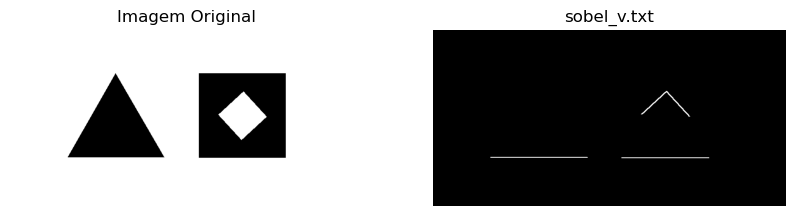

In [185]:
for fil in lista_txt:
    # Carregar filtro (exemplo: filtro Gaussiano 5x5)
    
    dimensoes, filtro = carregar_filtro(diretorio+fil)
    
    # Aplicar correlação
    imagem_filtrada = aplicar_correlacao(imagem, filtro)
    
    # Salvar e exibir resultado
    salvar_imagem(diretorio + "imagem_filtrada_" + fil[:-4] + ".jpg", imagem_filtrada)
    exibir_imagens_lado_a_lado(imagem, imagem_filtrada, fil)

In [140]:
"""Filtro Gaussiano 5x5:

Efeito: Suaviza a imagem, reduzindo ruídos e detalhes finos.
Uso: Ideal para pré-processamento, como redução de ruído antes da detecção de bordas.

Filtro Box 1x10:

Efeito: Suaviza a imagem horizontalmente, criando um efeito de desfoque na direção horizontal.
Uso: Pode ser usado para destacar características verticais.

Filtro Box 10x1:

Efeito: Suaviza a imagem verticalmente, criando um efeito de desfoque na direção vertical.
Uso: Pode ser usado para destacar características horizontais.

Filtro Box 10x10:

Efeito: Suaviza a imagem em ambas as direções, criando um desfoque uniforme.
Uso: Útil para reduzir detalhes e ruídos em toda a imagem.

Filtro Sobel (Magnitude):

Efeito: Destaca as bordas da imagem, tanto horizontais quanto verticais.
Uso: Ideal para detecção de bordas e realce de contornos."""

'Filtro Gaussiano 5x5:\n\nEfeito: Suaviza a imagem, reduzindo ruídos e detalhes finos.\nUso: Ideal para pré-processamento, como redução de ruído antes da detecção de bordas.\n\nFiltro Box 1x10:\n\nEfeito: Suaviza a imagem horizontalmente, criando um efeito de desfoque na direção horizontal.\nUso: Pode ser usado para destacar características verticais.\n\nFiltro Box 10x1:\n\nEfeito: Suaviza a imagem verticalmente, criando um efeito de desfoque na direção vertical.\nUso: Pode ser usado para destacar características horizontais.\n\nFiltro Box 10x10:\n\nEfeito: Suaviza a imagem em ambas as direções, criando um desfoque uniforme.\nUso: Útil para reduzir detalhes e ruídos em toda a imagem.\n\nFiltro Sobel (Magnitude):\n\nEfeito: Destaca as bordas da imagem, tanto horizontais quanto verticais.\nUso: Ideal para detecção de bordas e realce de contornos.'

## Implementação do Valor Absoluto de Sobel

In [144]:
def aplicar_sobel(imagem, filtro_horizontal, filtro_vertical):
    """
    Aplica o filtro Sobel (horizontal e vertical) e retorna a magnitude das bordas.
    """
    # Aplica o filtro Sobel horizontal e vertical
    sobel_h = aplicar_correlacao(imagem, filtro_horizontal)
    sobel_v = aplicar_correlacao(imagem, filtro_vertical)

    # Calcula a magnitude das bordas (valor absoluto)
    magnitude = np.sqrt(sobel_h**2 + sobel_v**2)

    # Normaliza para o intervalo [0, 255]
    magnitude_normalizada = normalizar_histograma(magnitude)

    return magnitude_normalizada

def normalizar_histograma(imagem):
    """
    Expande o histograma para o intervalo [0, 255].
    """
    # Encontra os valores mínimo e máximo
    minimo = np.min(imagem)
    maximo = np.max(imagem)

    # Expande o histograma
    imagem_normalizada = 255 * (imagem - minimo) / (maximo - minimo)
    return imagem_normalizada.astype(np.uint8)  # Converte para inteiro

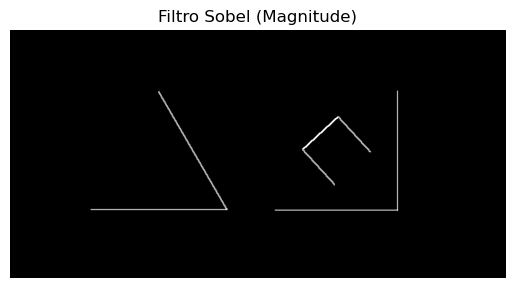

In [146]:
# Exemplo de uso para o filtro Sobel

# Carregar filtros Sobel
_, filtro_sobel_h = carregar_filtro(diretorio+"sobel_h.txt")
_, filtro_sobel_v = carregar_filtro(diretorio+"sobel_v.txt")

# Aplicar Sobel e processar
sobel_resultado = aplicar_sobel(imagem, filtro_sobel_h, filtro_sobel_v)

# Salvar e exibir resultado
salvar_imagem(diretorio+"sobel_resultado.jpg", sobel_resultado)
exibir_imagem(sobel_resultado, "Filtro Sobel (Magnitude)")

## Correlação Bidimensional m×n

In [149]:
"""O arquivo deve conter:  

- Dimensões do filtro (m×n).  
- Valores da máscara do filtro.  
- Offset (bias)b.  
- Passo (stride)p.  

Nome da função de ativação (neste caso, "ReLU")."""

'O arquivo deve conter:  \n\n- Dimensões do filtro (m×n).  \n- Valores da máscara do filtro.  \n- Offset (bias)b.  \n- Passo (stride)p.  \n\nNome da função de ativação (neste caso, "ReLU").'

In [199]:
def carregar_configuracao(caminho):
    """Carrega a configuração do filtro de um arquivo."""
    with open(caminho, 'r') as arquivo:
        linhas = arquivo.readlines()
        # Dimensões do filtro
        dimensoes = tuple(map(int, linhas[0].strip().split()))
        # Valores da máscara
        mascara = np.array([list(map(float, linha.strip().split())) for linha in linhas[1:dimensoes[0] + 1]])
        # Offset, passo e função de ativação
        offset = int(linhas[dimensoes[0] + 1].strip().split()[0])
        passo = int(linhas[dimensoes[0] + 2].strip().split()[0]) 
        funcao_ativacao = linhas[dimensoes[0] + 3].strip()
    return dimensoes, mascara, offset, passo, funcao_ativacao

def relu(x):
    """Função de ativação ReLU."""
    return np.maximum(0, x)

def aplicar_correlacao_com_offset_passo(imagem, filtro, offset, passo, funcao_ativacao):
    """
    Aplica correlação bidimensional com offset, passo e função de ativação.
    """
    m, n = filtro.shape
    altura, largura, canais = imagem.shape
    resultado = np.zeros((altura // passo, largura // passo, canais))

    for canal in range(canais):
        for i in range(0, altura - m + 1, passo):
            for j in range(0, largura - n + 1, passo):
                # Aplica a correlação
                regiao = imagem[i:i + m, j:j + n, canal]
                valor = np.sum(regiao * filtro) + offset
                # Aplica a função de ativação
                if funcao_ativacao == "ReLU":
                    valor = relu(valor)
                resultado[i // passo, j // passo, canal] = valor

    return resultado

def normalizar_histograma(imagem):
    """
    Expande o histograma para o intervalo [0, 255].
    """
    minimo = np.min(imagem)
    maximo = np.max(imagem)
    imagem_normalizada = 255 * (imagem - minimo) / (maximo - minimo)
    return imagem_normalizada.astype(np.uint8)


# Função principal para testar os filtros
def testar_filtros(imagem, caminho_config):
    # Carregar configuração
    dimensoes, filtro, offset, passo, funcao_ativacao = carregar_configuracao(caminho_config)

    # Aplicar correlação com offset, passo e ReLU
    resultado = aplicar_correlacao_com_offset_passo(imagem, filtro, offset, passo, funcao_ativacao)

    # Para o filtro Sobel, aplicar valor absoluto e expansão de histograma
    if "sobel" in caminho_config.lower():
        resultado = np.abs(resultado)
        resultado = normalizar_histograma(resultado)

    # Salvar e exibir resultado
    nome_filtro = caminho_config.split("/")[-1].split(".")[0]
    salvar_imagem(f"caminho/para/resultado_{nome_filtro}.jpg", resultado)
    exibir_imagem(resultado, f"Filtro {nome_filtro}")

def salvar_imagem(caminho, imagem):
    """Salva a imagem resultante."""
    # Normalizar imagem se for float64
    if imagem.dtype == np.float64:
        # Normalizar para o intervalo [0, 255] e converter para uint8
        imagem = np.uint8(np.clip(imagem * 255, 0, 255))
    
    # Salvar a imagem com OpenCV
    cv2.imwrite(caminho, cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR))

In [187]:
# Carregar imagem
diretorio_2 = r'C:\Users\kenny\OneDrive\Documentos\UFPB\P7\Processamento Digital de Imagens\TrabalhoPDI2\filtrosconv\\'

In [195]:
#Abrindo Imagem
imagem = carregar_imagem(diretorio+'Shapes.png')

n_lista_txt = listar_arquivos_txt(diretorio_2)

print("Arquivos .txt encontrados:",   n_lista_txt)

Arquivos .txt encontrados: ['gaus5x5_config.txt', 'sobel_h_config.txt']


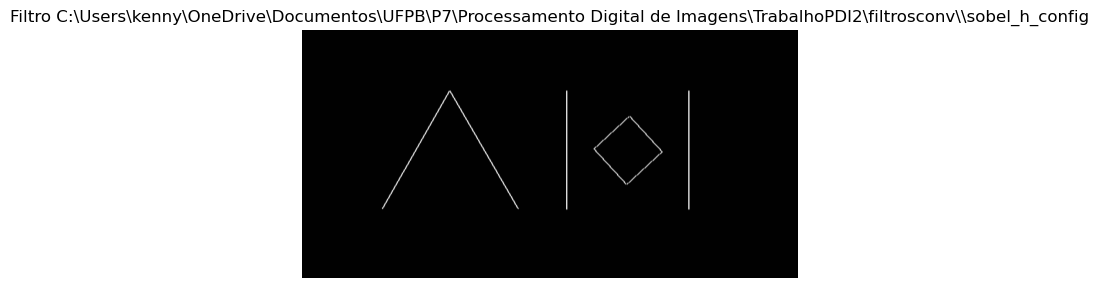

In [193]:
# Testar filtro Sobel horizontal
testar_filtros(imagem, diretorio_2+"sobel_h_config.txt")

In [ ]:
# Testar filtro Gaussiano 5x5
testar_filtros(imagem, diretorio_2+"gaus5x5_config.txt")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..261.68499999999995].


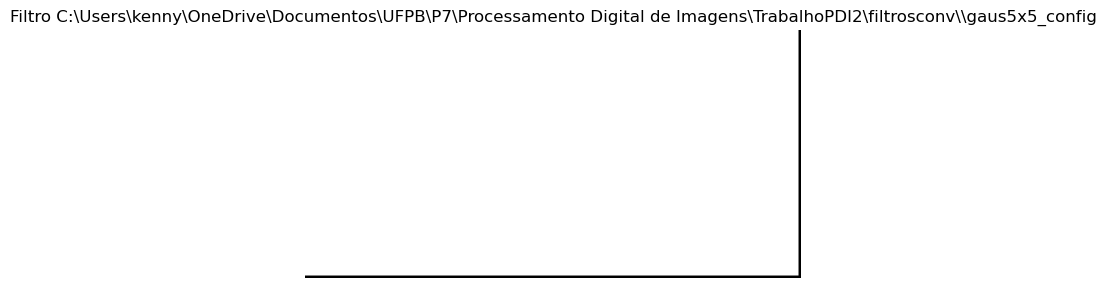

AttributeError: 'NoneType' object has no attribute 'dtype'

In [197]:
for fil in n_lista_txt:
       
    # Aplicar correlação
    imagem_correlacao = testar_filtros(imagem, diretorio_2+fil)
    
    # Salvar e exibir resultado
    salvar_imagem(diretorio_2 + "correlacao_bidimensional" + fil[:-4] + ".jpg", imagem_correlacao)

#exibir_imagens_lado_a_lado(imagem, imagem_filtrada, fil)